In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Big Data Assignment/Final Project/training_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-1-f1dad90b8f9c>:14: DtypeWarning: Columns (6,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Big Data Assignment/Final Project/training_data.csv')


In [2]:
# Display unique data types in the DataFrame
unique_data_types = list(set(df.dtypes.tolist()))
print("Unique Data Types:", unique_data_types)

# Select numerical features
df_numerical_features = df.select_dtypes(include=['float64', 'int64'])
print("Numerical Features:")
print(df_numerical_features.head())

# Calculate correlation with 'Loss_Ratio'
df_numerical_correlation = df_numerical_features.corr()['Loss_Ratio'][:-1]  # Exclude 'Loss_Ratio' itself
strong_features_list = df_numerical_correlation[abs(df_numerical_correlation) > 0.5].sort_values(ascending=False)
print("Strongly correlated features with Loss Ratio:\n{}".format(strong_features_list))

Unique Data Types: [dtype('int64'), dtype('O'), dtype('float64')]
Numerical Features:
    PolicyNo  Policy_Installment_Term  Vehicle_Territory  Vehicle_Make_Year  \
0  164532941                        6                 35               2004   
1  164533241                        6                 35               1980   
2  164534633                        6                 17               2005   
3  164534839                        6                 17               2005   
4  164534840                        6                 17               2005   

   Vehicle_New_Cost_Amount  Vehicle_Symbol  \
0                       -1              11   
1                       -1              11   
2                       -1              10   
3                       -1              12   
4                       -1              12   

   Vehicle_Number_Of_Drivers_Assigned  Vehicle_Miles_To_Work  \
0                                   1                     -1   
1                                 

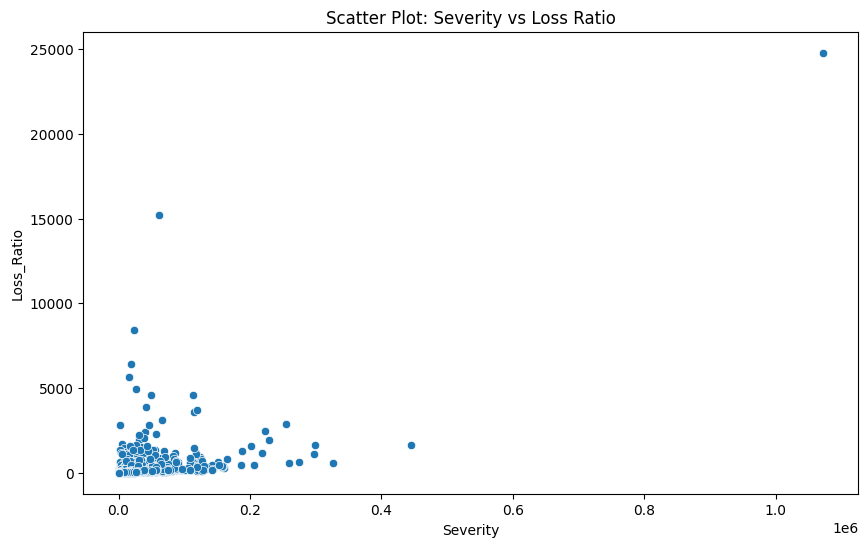

In [3]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_numerical_features, x="Severity", y="Loss_Ratio")
plt.title('Scatter Plot: Severity vs Loss Ratio')
plt.show()

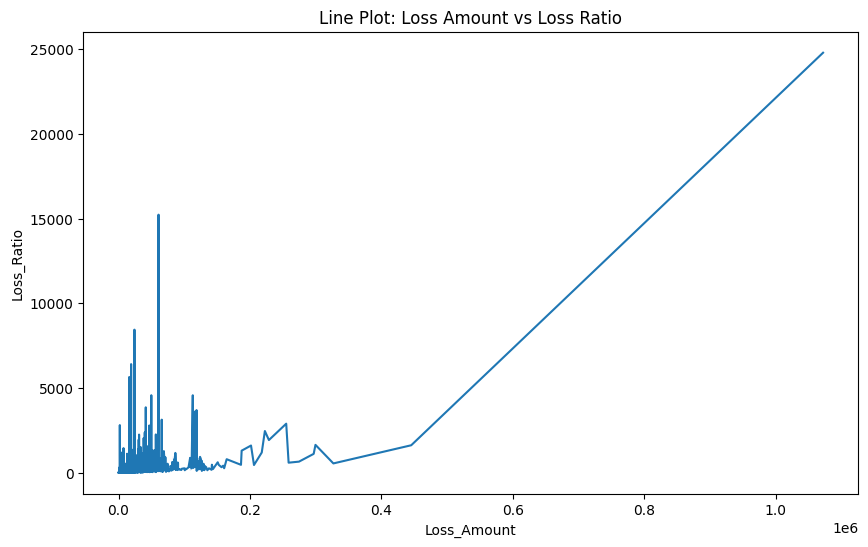

In [4]:
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_numerical_features, x="Loss_Amount", y="Loss_Ratio")
plt.title('Line Plot: Loss Amount vs Loss Ratio')
plt.show()

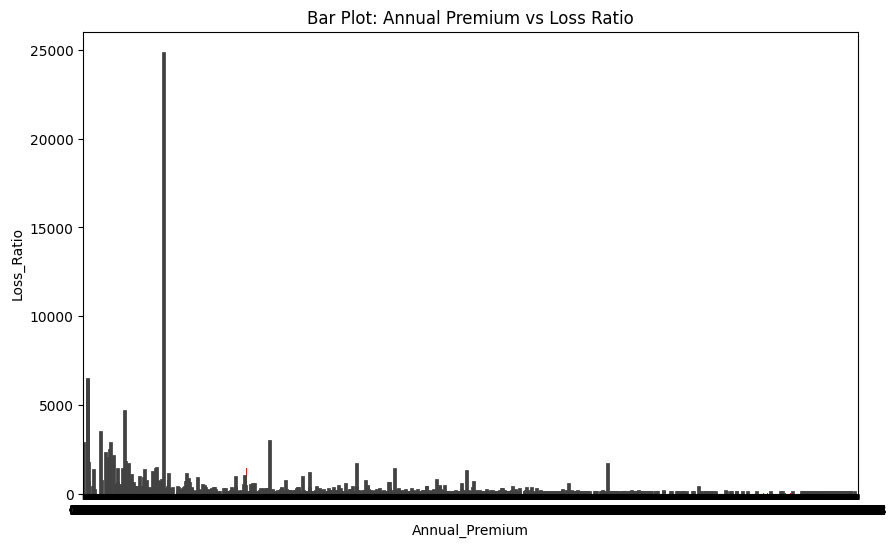

In [5]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_numerical_features, x="Annual_Premium", y="Loss_Ratio", color='r')
plt.title('Bar Plot: Annual Premium vs Loss Ratio')
plt.show()

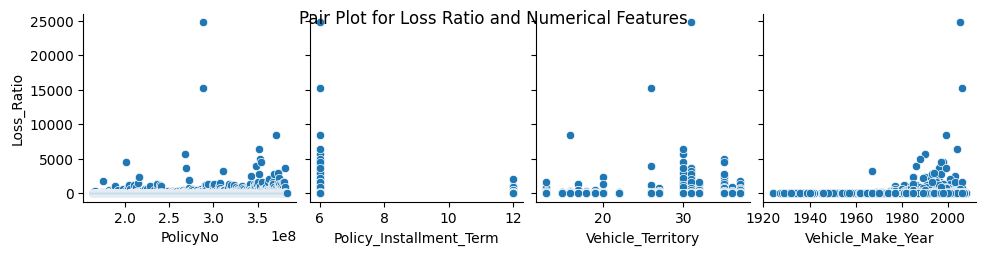

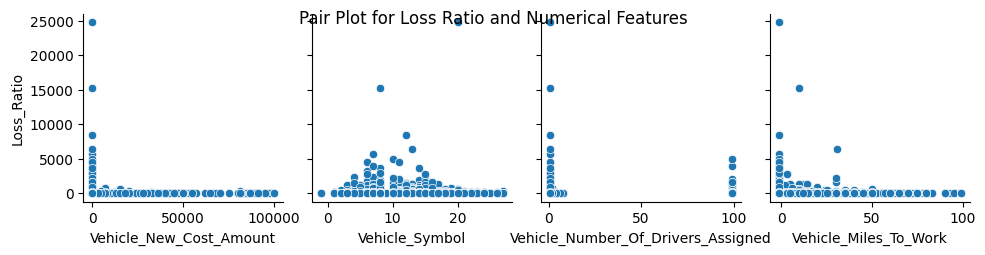

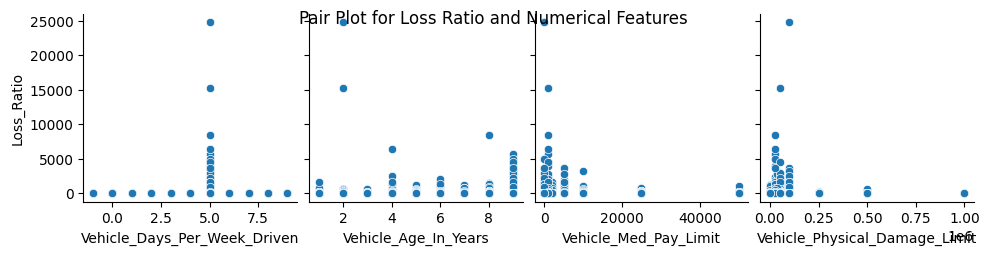

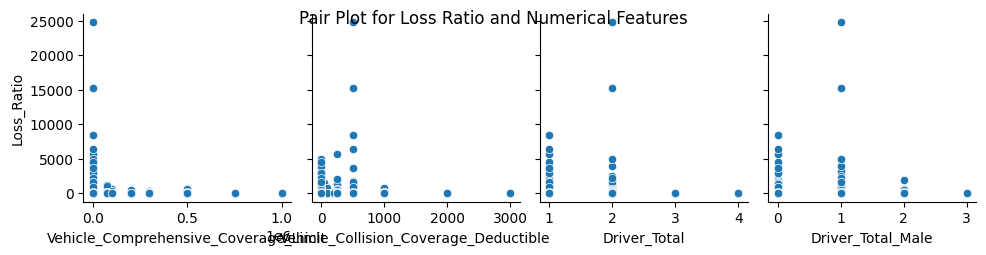

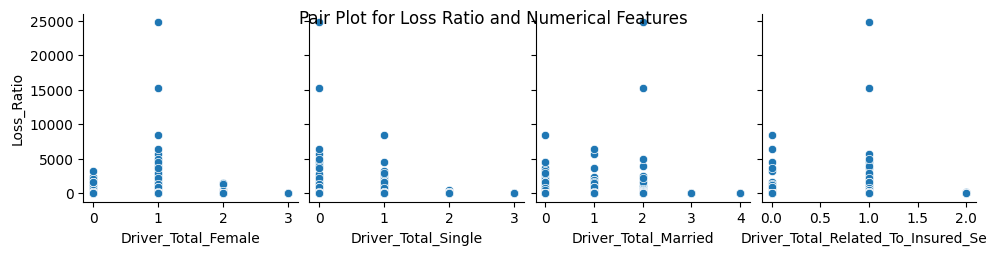

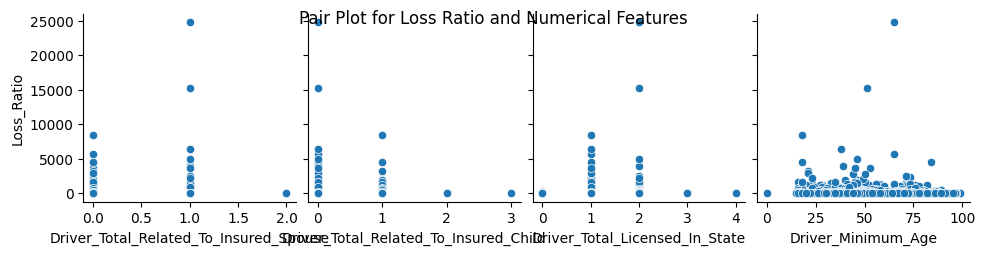

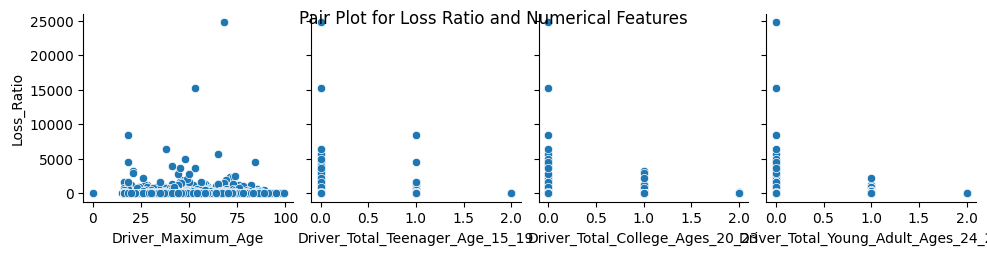

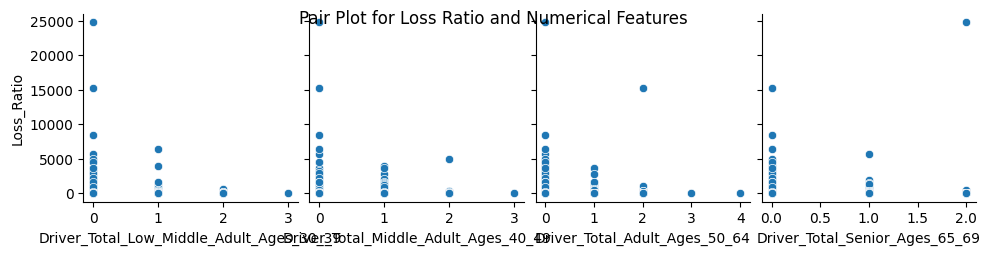

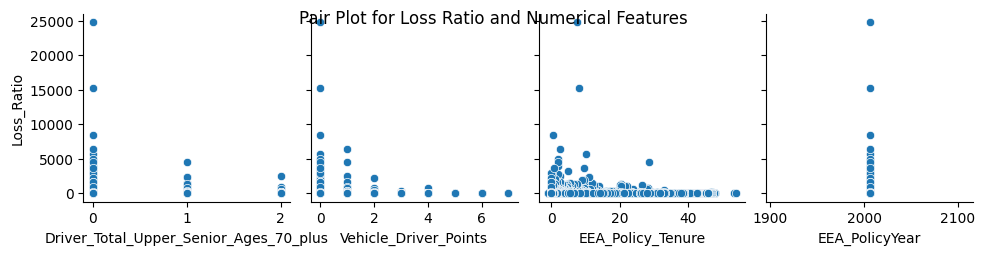

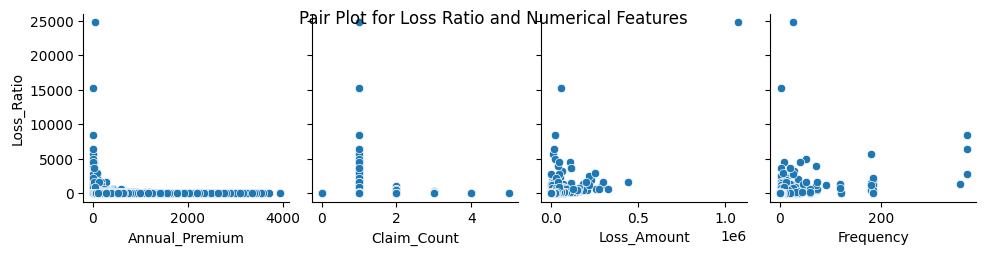

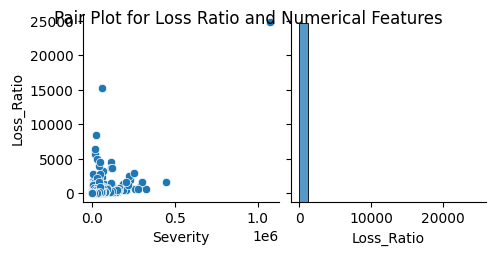

In [6]:
# Pair plot for numerical features
num_cols = len(df_numerical_features.columns)
for i in range(0, num_cols, 4):
    sns.pairplot(data=df_numerical_features,
                 x_vars=df_numerical_features.columns[i:i + 4],
                 y_vars=['Loss_Ratio'])
    plt.suptitle('Pair Plot for Loss Ratio and Numerical Features')
    plt.show()
